In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.model_selection import RandomizedSearchCV
from sklearn.isotonic import IsotonicRegression
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

In [2]:
def metrics(y,y_pred):
    r2 = r2_score(y, y_pred)
    mae= mean_absolute_error(y, y_pred)
    mape =mean_absolute_percentage_error(y, y_pred)
    mse=mean_squared_error(y, y_pred)
    print(f"metrics: \nMAPE: {(mape*100).round(3)}%  R2: {r2.round(3)}  MAE: {mae.round(3)}  MSE: {mse.round(3)}")

In [3]:
df=pd.read_excel('Dataset.xlsx')
df.describe()

,"T, К","T, °C","p, МПа"
count,398.000000,398.000000,398.000000
mean,283.622990,10.472990,10.918920
std,6.416413,6.416413,11.648798
min,273.160000,0.010000,2.600000
25%,279.025000,5.875000,4.730750
50%,283.140000,9.990000,7.159500
75%,286.255000,13.105000,10.192500
max,301.670000,28.520000,68.086000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T, К    398 non-null    float64
 1   T, °C   398 non-null    float64
 2   p, МПа  398 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


Все строки заполнены, пропусков нет

In [5]:
dfT=df['T, К']
dfP=df['p, МПа']

Переводим в array

In [6]:
T=dfT.to_numpy()
P=dfP.to_numpy()
X = np.vstack((T))
y = np.vstack((P))

ML модель для предсказания значения P

Catboost

In [7]:
# model = CatBoostRegressor(task_type='GPU')

# grid = {'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS', 'Poisson'],
#         'learning_rate': [0.05, 0.1, 0.15],
#         'depth': [12, 10, 15],
#         'l2_leaf_reg': [1, 3, 5],
#         'random_state': [0, 42],
#         'n_estimators': range(130,150,10),
#         # 'loss_function': ['MAE', 'RMSE', 'R2','Poisson', 'Quantile:alpha=0.95']
#         }

# grid_search_result = model.grid_search(grid, 
#                                        X=X, 
#                                        y=y, 
#                                        plot=True)

In [8]:
# print(grid_search_result['params'])

In [9]:
# cat= CatBoostRegressor(iterations=130 , depth=10, loss_function='RMSE', random_seed=0, learning_rate=0.1,l2_leaf_reg=1, bootstrap_type='MVS', task_type='GPU')
cat= CatBoostRegressor(iterations=140 , depth=10, loss_function='RMSE', random_seed=42, learning_rate=0.09,l2_leaf_reg=1, bootstrap_type='Bayesian', task_type='GPU')
cat.fit(X, y, verbose=False)
# cat.save_model('cat.cbm')
cat_pred=cat.predict(X)
cat.score(X, cat_pred)

1.0

In [10]:
metrics(y, cat_pred)

metrics: 
MAPE: 1.358%  R2: 0.998  MAE: 0.202  MSE: 0.26


XGBOOST

In [11]:
# xgbmodel = XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [0.03, 0.1], #so called `eta` value
#               'max_depth': [2,3.5, 10],
              
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [0,150,10]}

# xgb_grid = GridSearchCV(xgbmodel,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X,
#          y)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [12]:
xgb=XGBRegressor(colsampe_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=150)
xgb.fit(X, y, verbose=False)
xgb_pred=xgb.predict(X)
xgb.score(X, xgb_pred)
# Сохранение модели
# with open('xgb_model.pkl', 'wb') as f:
#     pickle.dump(xgb, f)

1.0

In [13]:
with open('xgb_model.pkl', 'rb') as f:
    xgb_loaded = pickle.load(f)

# Использование загруженной модели для предсказаний
predictions = xgb_loaded.predict(290)
predictions

array([16.066406], dtype=float32)

In [14]:
xgb.predict(290)

array([16.066406], dtype=float32)

In [15]:
metrics(y, xgb_pred)

metrics: 
MAPE: 0.941%  R2: 0.999  MAE: 0.123  MSE: 0.088


SVR

In [16]:
# X_kernel = pairwise_kernels(X)


In [17]:
svr = SVR(kernel='rbf', cache_size=1000)
svr.fit(X, y)
svr_pred=svr.predict(X)
svr.score(X, svr_pred)
# with open('svr_model.pkl', 'wb') as f:
#     pickle.dump(svr, f)

1.0

In [18]:
metrics(y, svr_pred)

metrics: 
MAPE: 3.415%  R2: 0.873  MAE: 0.928  MSE: 17.24


Дерево решений

In [19]:
tree=DecisionTreeRegressor(criterion='poisson', random_state=42)
tree.fit(X,y)
tree_pred=tree.predict(X)
tree.score(X, tree_pred)

1.0

In [20]:
metrics(y, tree_pred)

metrics: 
MAPE: 0.443%  R2: 1.0  MAE: 0.04  MSE: 0.019


Визуализация

In [21]:
r2_svr = r2_score(y, svr_pred)
mape_svr =mean_absolute_percentage_error(y, svr_pred)
r2_cat = r2_score(y, cat_pred)
mape_cat =mean_absolute_percentage_error(y, cat_pred)
r2_xgb = r2_score(y, xgb_pred)
mape_xgb =mean_absolute_percentage_error(y, xgb_pred)
r2_tree = r2_score(y, tree_pred)
mape_tree =mean_absolute_percentage_error(y, tree_pred)

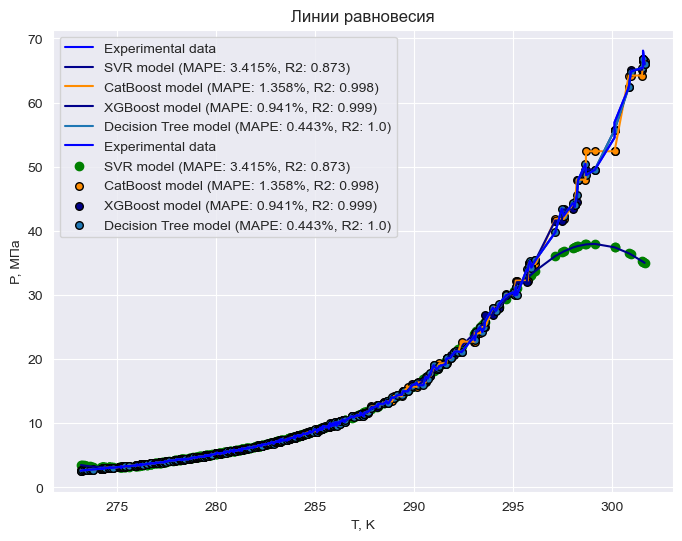

In [22]:
sns.set_style(style='darkgrid')

plt.figure(figsize=(8, 6))
# plt.xlim(273, 285)
# plt.ylim(2, 8)


plt.plot(X, y, label=f'Experimental data', c='blue')
plt.plot(X, svr_pred, label=f'SVR model (MAPE: {(mape_svr*100).round(3)}%, R2: {(r2_svr).round(3)})', c='darkblue')
plt.plot(X, cat_pred, label=f'CatBoost model (MAPE: {(mape_cat*100).round(3)}%, R2: {(r2_cat).round(3)})', c='darkorange')
plt.plot(X, xgb_pred, label=f'XGBoost model (MAPE: {(mape_xgb*100).round(3)}%, R2: {(r2_xgb).round(3)})', c='darkblue')
plt.plot(X, tree_pred, label=f'Decision Tree model (MAPE: {(mape_tree*100).round(3)}%, R2: {(r2_tree).round(3)})')

plt.plot(X, y, label=f'Experimental data' ,c='blue')
plt.scatter(X, svr_pred, label=f'SVR model (MAPE: {(mape_svr*100).round(3)}%, R2: {(r2_svr).round(3)})', c='green')
plt.scatter(X, cat_pred, label=f'CatBoost model (MAPE: {(mape_cat*100).round(3)}%, R2: {(r2_cat).round(3)})',s=30,edgecolor="black", c='darkorange')
plt.scatter(X, xgb_pred, label=f'XGBoost model (MAPE: {(mape_xgb*100).round(3)}%, R2: {(r2_xgb).round(3)})',s=30, edgecolor="black",c='darkblue')
plt.scatter(X, tree_pred, label=f'Decision Tree model (MAPE: {(mape_tree*100).round(3)}%, R2: {(r2_tree).round(3)})',s=30, edgecolor="black")

plt.xlabel('T, K')
plt.ylabel('P, МПа')
plt.title('Линии равновесия')
plt.grid(True)

# Настройка легенды
plt.legend()
plt.savefig('P(T)Линия равновесия с моделью ML lines.png', dpi=1000)
plt.show()

Попробуем сделать тест драйв модели на данных со статьи: Application of Machine Learning in Predicting Formation
Condition of Multi-Gas Hydrate

In [23]:
test=pd.read_excel('test.xlsx')
test.describe()

,"T, К","P, МПа"
count,26.000000,26.000000
mean,282.866154,8.402615
std,5.351443,4.993679
min,273.490000,2.716000
25%,278.462500,4.444250
50%,283.215000,7.284500
75%,286.710000,10.660000
max,291.600000,19.195000


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T, К    26 non-null     float64
 1   P, МПа  26 non-null     float64
dtypes: float64(2)
memory usage: 548.0 bytes


In [25]:
test_T=test['T, К']
test_P=test['P, МПа']

In [26]:
T_test=test_T.to_numpy()
P_test=test_P.to_numpy()
X_test = np.vstack((T_test))
y_test = np.vstack((P_test))

Metrics for CatBoost:
MAPE: 1.5196652681578602%
R2: 0.9982298380167872
MAE: 0.12630644769227456
RMSE: 0.2060205143848966



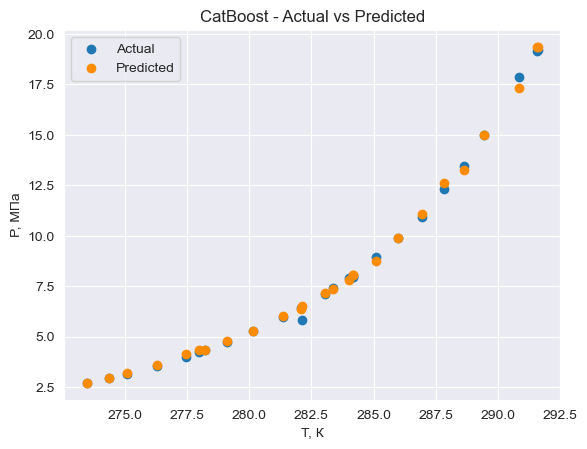

Metrics for XGBoost:
MAPE: 1.1693281254990278%
R2: 0.9985906828162883
MAE: 0.09585873508453377
RMSE: 0.18382659213081817



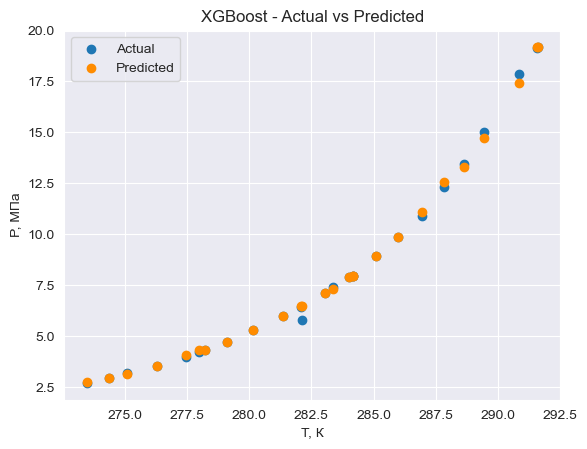

Metrics for SVR:
MAPE: 2.2565981530939845%
R2: 0.9977664558027802
MAE: 0.13824673637524457
RMSE: 0.23142018573214032



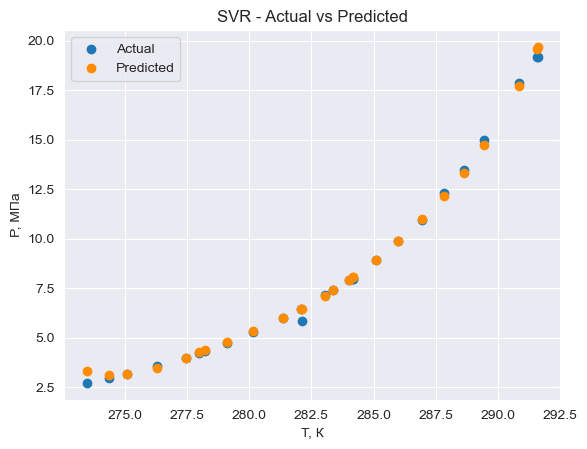

Metrics for Tree:
MAPE: 0.5887065602395551%
R2: 0.9991762317394669
MAE: 0.03232692307692309
RMSE: 0.14054211660019045



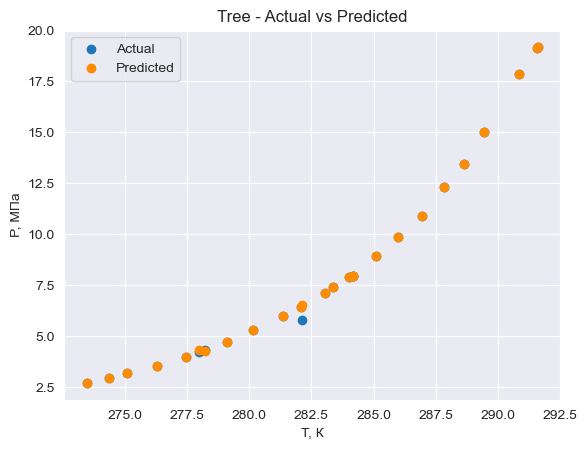

In [27]:
models = [cat, xgb, svr, tree]
model_names = ['CatBoost', 'XGBoost', 'SVR', 'Tree']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Metrics for {name}:")
    print(f"MAPE: {mape*100}%")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"RMSE: {mse**0.5}\n")
    
    plt.figure()
    plt.scatter(X_test,y_test, label='Actual')
    plt.scatter(X_test,y_pred, label='Predicted', c='darkorange')
    plt.legend()
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel('Т, К')
    plt.ylabel('P, МПа')
    plt.savefig(f"{name}_actual_vs_predicted.png", dpi=1000)
    plt.show()